In [1]:
import numpy as np

In [2]:
def AND_gate(x):
    w1=0.5
    w2=0.5
    b=-0.7

    result=x[0]*w1 + x[1]*w2 + b

    if result <=0:
       return 0
    else:
        return 1

In [3]:
input_data=np.array([[0,0],[0,1],[1,0],[1,1]])
result=[]
for x in input_data:
    result.append(AND_gate(x))

print(result)

[0, 0, 0, 1]


In [4]:
def NAND_gate(x):
    w1=-0.5
    w2=-0.5
    b=0.7
    
    result=x[0]*w1 + x[1]*w2 + b

    if result <=0:
       return 0
    else:
        return 1


In [5]:
result=[]
for x in input_data:
    result.append(NAND_gate(x))
print(result)

[1, 1, 1, 0]


In [6]:
def OR_gate(x):
    w1=0.6
    w2=0.6
    b=-0.5
    
    result=x[0]*w1 + x[1]*w2 + b

    if result <=0:
       return 0
    else:
        return 1

In [8]:
result=[]
for x in input_data:
    result.append(OR_gate(x))
print(result)

[0, 1, 1, 1]


In [13]:
s1=[]
s2=[]
new_input=[]
final_output=[]

for i in range(len(input_data)):
    s1 = NAND_gate(input_data[i])
    s2 = OR_gate(input_data[i])
    new_input.append(s1)
    new_input.append(s2)


    result = AND_gate(new_input)
    final_output.append(result)
    new_input=[]
print(final_output)

[0, 1, 1, 0]


In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [27]:
x = torch.FloatTensor([[0,0], [0,1], [1,0], [1,1]])
y = torch.FloatTensor([[0],[1],[1],[0]]) 

In [28]:
#파이토치의 nn.Sequential은 순차적으로 레이어를 쌓아 신경망 모델을 만드는 방법 중 하나
#Sequential 모델은 입력부터 출력까지 순차적으로 연결된 레이어들을 간단하게 정의할 수 있어서 편리하게 사용

model = nn.Sequential(
    nn.Linear(2, 10, bias=True), #nn.Linear(2, 10, bias=True): 2개의 입력 노드와 10개의 출력 노드를 가진 선형 레이어입니다. 이 레이어는 입력과 출력을 모두 연결하는 가중치와 편향을 포함합니다.
    nn.Sigmoid(), # nn.Sigmoid(): 시그모이드 활성화 함수를 적용하는 레이어입니다. 시그모이드 함수는 입력값을 0과 1 사이의 값으로 변환하여 출력합니다.
    nn.Linear(10, 10, bias=True), # nn.Linear(10, 10, bias=True): 10개의 입력 노드와 10개의 출력 노드를 가진 선형 레이어입니다.
    nn.Sigmoid(),
    nn.Linear(10, 10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10, 1, bias=True), # nn.Linear(10, 1, bias=True): 10개의 입력 노드와 1개의 출력 노드를 가진 선형 레이어입니다. 이 레이어는 마지막 결과를 출력하는 데 사용됩니다
    nn.Sigmoid()
)

In [29]:
criterion = torch.nn.BCELoss()
optimizer= optim.SGD(model.parameters(), lr=1)

In [32]:
for epoch in range(100001):
    optimizer.zero_grad()

    y_hat=model(x)
    cost=criterion(y_hat, y)
    cost.backward()
    optimizer.step()

    if epoch%1000==0:
        print(epoch, cost.item())

0 0.00010704212763812393
1000 9.124650387093425e-05
2000 7.939473289297894e-05
3000 7.020802149781957e-05
4000 6.286303687375039e-05
5000 5.687738303095102e-05
6000 5.188302748138085e-05
7000 4.770710438606329e-05
8000 4.4120293750893325e-05
9000 4.1005474486155435e-05
10000 3.828779517789371e-05
11000 3.5903824027627707e-05
12000 3.3827902370831e-05
13000 3.1949315598467365e-05
14000 3.0253006116254255e-05
15000 2.872612458304502e-05
16000 2.7353504265192896e-05
17000 2.6099567548953928e-05
18000 2.492845851520542e-05
19000 2.3886983399279416e-05
20000 2.2922329662833363e-05
21000 2.2016996808815747e-05
22000 2.1173957065911964e-05
23000 2.0422539819264784e-05
24000 1.9690245608217083e-05
25000 1.9014976714970544e-05
26000 1.8388840544503182e-05
27000 1.781080754881259e-05
28000 1.7248879885300994e-05
29000 1.6706500900909305e-05
30000 1.6234376744250767e-05
31000 1.5743999028927647e-05
32000 1.5327650544350035e-05
33000 1.48934377648402e-05
34000 1.4525984624924604e-05
35000 1.414062

In [34]:
with torch.no_grad():
    h=model(x)
    prediction=(h>0.5).float()
    accuracy=(prediction==y).float().mean()
    print(h)
    print(prediction)
    print(accuracy)
    print(y)

tensor([[4.0908e-06],
        [9.9999e-01],
        [9.9999e-01],
        [5.6993e-06]])
tensor([[0.],
        [1.],
        [1.],
        [0.]])
tensor(1.)
tensor([[0.],
        [1.],
        [1.],
        [0.]])


AttributeError: module 'matplotlib.pyplot' has no attribute 'plt'

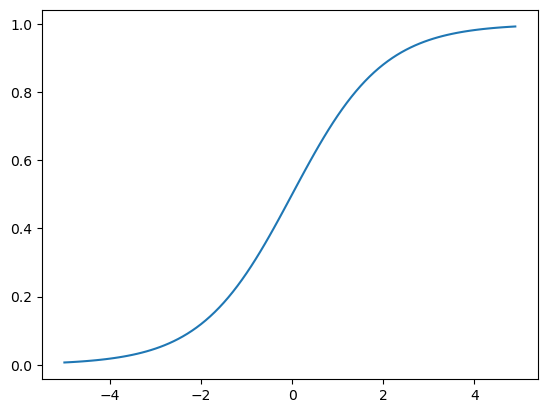

In [36]:
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x=np.arange(-5.0, 5.0, 0.1)
y=sigmoid(x)

plt.plot(x,y)
plt.plt([0,0], [1.0, 0.0], :)
plt.title("Sigmoid Function")
plt.show()